In [24]:
from sklearn import metrics
import numpy as np
from scipy import stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
exact_all = np.load(f'results/exact_False_signal_embedding.npz', allow_pickle=True)
fast_all = np.load(f'results/fast_False_all_hvgs_signal_embedding.npz', allow_pickle=True)

In [3]:
exact_all_signal = pd.DataFrame(exact_all['signal_embedding'], index=exact_all['genes'])
exact_all_loc = pd.DataFrame(exact_all['localization_score'], index=exact_all['genes'])

In [4]:
fast_all_signal = pd.DataFrame(fast_all['signal_embedding'], index=fast_all['genes'])
fast_all_loc = pd.DataFrame(fast_all['localization_score'], index=fast_all['genes'])

In [5]:
shared_genes = list(set(exact_all_loc.index).intersection(fast_all_loc.index))

In [6]:
stats.pearsonr(exact_all_loc.loc[shared_genes].values.flatten(), fast_all_loc.loc[shared_genes].values.flatten()).statistic

0.9263769549325719

In [16]:
exact_all_dist = metrics.pairwise_distances(exact_all_signal.loc[shared_genes]).flatten()
fast_all_dist = metrics.pairwise_distances(fast_all_signal.loc[shared_genes]).flatten()

In [17]:
stats.pearsonr(exact_all_dist, fast_all_dist).statistic

0.9003213572489637

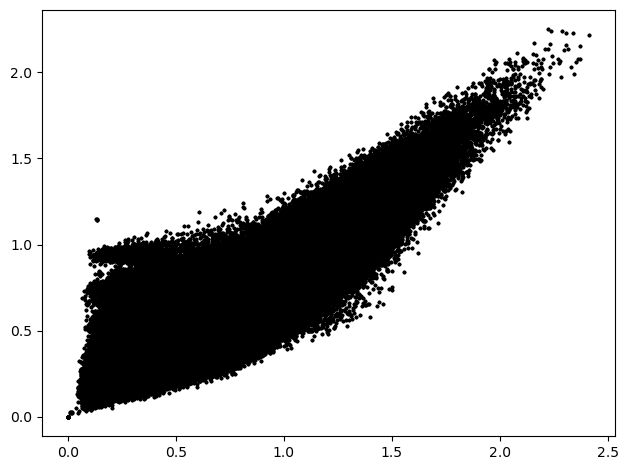

In [31]:
fig, ax = plt.subplots()
plt.scatter(exact_all_dist, fast_all_dist, c='black', s=3)
plt.tight_layout()
fig.savefig('figures/exact_vs_fast_distances.png', dpi=500)

In [8]:
exact_qr = np.load(f'results/exact_True_signal_embedding.npz', allow_pickle=True)
fast_qr = np.load(f'results/fast_True_all_hvgs_signal_embedding.npz', allow_pickle=True)

In [9]:
exact_qr_signal = pd.DataFrame(exact_qr['signal_embedding'], index=exact_qr['genes'])
exact_qr_loc = pd.DataFrame(exact_qr['localization_score'], index=exact_qr['genes'])

In [10]:
fast_qr_signal = pd.DataFrame(fast_qr['signal_embedding'], index=fast_qr['genes'])
fast_qr_loc = pd.DataFrame(fast_qr['localization_score'], index=fast_qr['genes'])

In [13]:
shared_genes = list(set(exact_qr_loc.index).intersection(fast_qr_loc.index))

In [11]:
stats.pearsonr(exact_qr_loc.loc[shared_genes].values.flatten(), fast_qr_loc.loc[shared_genes].values.flatten()).statistic

0.6649073028502062

In [14]:
exact_qr_dist = metrics.pairwise_distances(exact_qr_signal.loc[shared_genes]).flatten()
fast_qr_dist = metrics.pairwise_distances(fast_qr_signal.loc[shared_genes]).flatten()

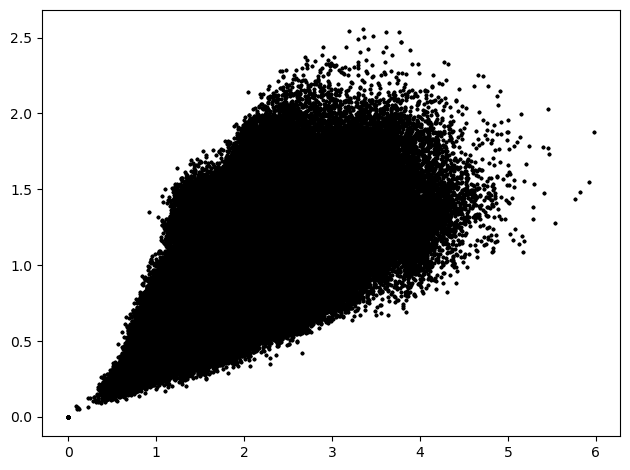

In [30]:
fig, ax = plt.subplots()
plt.scatter(exact_qr_dist, fast_qr_dist, c='black', s=3)
plt.tight_layout()
fig.savefig('figures/qr_exact_vs_fast_distances.png', dpi=500)

In [15]:
stats.pearsonr(exact_qr_dist, fast_qr_dist).statistic

0.7130959307397937